In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

In [3]:
df = pd.read_csv('Price_euros_train.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1097 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1055 non-null   object 
 11  Weight            1086 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


### Сначала избавимся от пропусков

In [5]:
# посмотрим процент пропущенных значений
df_nan = df.loc[:, df.isnull().any()]   
df_nan.isnull().sum() / len(df_nan) * 100

ScreenResolution    0.992780
OpSys               4.783394
Weight              1.985560
dtype: float64

In [6]:
df["ScreenResolution"].mode()[0]

'Full HD 1920x1080'

In [7]:
df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\3888191246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0], inplace=True)


In [8]:
df['OpSys'].value_counts()

OpSys
Windows 10      864
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: count, dtype: int64

In [9]:
df['OpSys'].fillna('No OS', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\761733143.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSys'].fillna('No OS', inplace=True)


In [10]:
df["Weight"].mode()[0]

'2.2kg'

In [11]:
df["Weight"].fillna(df["Weight"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\20059657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].fillna(df["Weight"].mode()[0], inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1108 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1108 non-null   object 
 11  Weight            1108 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


### Теперь почистим все числовые столбцы и приведем их к int

In [13]:
df['Memory'].value_counts()

Memory
256GB SSD                        344
1TB HDD                          187
500GB HDD                        118
512GB SSD                        100
128GB SSD +  1TB HDD              81
256GB SSD +  1TB HDD              66
128GB SSD                         64
32GB Flash Storage                34
2TB HDD                           14
64GB Flash Storage                12
1TB SSD                           11
512GB SSD +  1TB HDD              11
256GB SSD +  2TB HDD               9
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           5
256GB Flash Storage                5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
180GB SSD                          3
128GB SSD +  2TB HDD               2
16GB SSD                           2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                       

In [14]:
df['Memory'].replace('512GB SSD +  512GB SSD', '512GB SSD +  512GB HDD', inplace=True)
df['Memory'].replace('256GB SSD +  256GB SSD', '256GB SSD +  256GB HDD', inplace=True)
df['Memory'].replace('1TB HDD +  1TB HDD', '1TB SSD +  1TB HDD', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\2406933193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory'].replace('512GB SSD +  512GB SSD', '512GB SSD +  512GB HDD', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15768\2406933193.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [15]:
df['Memory'] = df['Memory'].str.replace('1.0TB', '1024GB')
df['Memory'] = df['Memory'].str.replace('1TB', '1024GB')
df['Memory'] = df['Memory'].str.replace('2TB', '2048GB')
df['Memory'] = df['Memory'].str.replace('GB', '')


In [16]:
df[df['Memory'].str.contains('SSD')]['Memory'].value_counts()

Memory
256 SSD                   344
512 SSD                   100
128 SSD +  1024 HDD        81
256 SSD +  1024 HDD        66
128 SSD                    64
512 SSD +  1024 HDD        11
1024 SSD                   11
256 SSD +  2048 HDD         9
32 SSD                      5
512 SSD +  2048 HDD         3
180 SSD                     3
1024 SSD +  1024 HDD        3
256 SSD +  256 HDD          2
256 SSD +  500 HDD          2
128 SSD +  2048 HDD         2
16 SSD                      2
64 SSD                      1
512 SSD +  512 HDD          1
240 SSD                     1
8 SSD                       1
256 SSD +  1024 Hybrid      1
Name: count, dtype: int64

In [17]:
df['SSD'] = 0
df['HDD'] = 0
df['Flash Storage'] = 0
df['Hybrid'] = 0

# Заполнение новых столбцов
for index, row in df.iterrows():
    parts = row['Memory'].split('+')
    for part in parts:
        if 'SSD' in part:
            df.at[index, 'SSD'] = int(''.join(filter(str.isdigit, part)))
        elif 'HDD' in part:
            df.at[index, 'HDD'] = int(''.join(filter(str.isdigit, part)))
        elif 'Flash Storage' in part:
            df.at[index, 'Flash Storage'] = int(''.join(filter(str.isdigit, part)))
        elif 'Hybrid' in part:
            df.at[index, 'Hybrid'] = int(''.join(filter(str.isdigit, part)))

In [18]:
df[df['Memory'] == '16 Flash Storage'][['SSD', 'HDD', 'Flash Storage', 'Hybrid', 'Memory']] 
df.drop(columns=['Memory'], inplace=True)

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                440
1366x768                                         241
IPS Panel Full HD 1920x1080                      191
IPS Panel Full HD / Touchscreen 1920x1080         46
Full HD / Touchscreen 1920x1080                   36
1600x900                                          19
Quad HD+ / Touchscreen 3200x1800                  15
Touchscreen 1366x768                              12
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              6
IPS Panel 1366x768                                 6
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Retina Display 2560x1600                 5
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x12

In [20]:
#разделим столбец с разрешением на ширину и длину
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)

In [21]:

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

df['IPS Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

df['Full HD'] = df['ScreenResolution'].apply(lambda x: 1 if 'Full HD' in x else 0)


In [22]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [23]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,SSD,HDD,Flash Storage,Hybrid,Width,Height,Touchscreen,IPS Panel,Full HD
0,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,128,0,1440,900,0,0,0
1,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,512,0,0,0,2880,1800,0,1,0
2,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,256,0,0,0,2560,1600,0,1,0
3,6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,AMD Radeon R5,Windows 10,2.1kg,400.00,0,500,0,0,1366,768,0,0,0
4,7,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.2GHz,16GB,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,0,0,256,0,2880,1800,0,1,0


In [24]:
df['Weight'].value_counts()

Weight
2.2kg     127
2.1kg      51
2.4kg      37
2.3kg      32
2kg        30
         ... 
1.14kg      1
3.8kg       1
3.31kg      1
1.19kg      1
4.0kg       1
Name: count, Length: 171, dtype: int64

In [25]:
df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.extract(r'([0-9.,]+)')
df['Weight'] = df['Weight'].astype(float)

In [26]:
df['Ram'].value_counts()    

Ram
8GB     525
4GB     323
16GB    172
6GB      34
12GB     19
2GB      18
32GB     13
24GB      3
64GB      1
Name: count, dtype: int64

In [27]:
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.extract(r'(\d+)')
df['Ram'] = df['Ram'].astype(int)

In [28]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              158
Intel Core i7 7700HQ 2.8GHz             123
Intel Core i7 7500U 2.7GHz              116
Intel Core i5 8250U 1.6GHz               63
Intel Core i7 8550U 1.8GHz               63
                                       ... 
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core M 7Y30 1.0GHz                  1
Intel Xeon E3-1535M v6 3.1GHz             1
Intel Core i3 6100U 2.1GHz                1
AMD A9-Series 9410 2.9GHz                 1
Name: count, Length: 112, dtype: int64

In [29]:
df[df['Cpu'].str.contains('GHz')]['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              158
Intel Core i7 7700HQ 2.8GHz             123
Intel Core i7 7500U 2.7GHz              116
Intel Core i5 8250U 1.6GHz               63
Intel Core i7 8550U 1.8GHz               63
                                       ... 
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core M 7Y30 1.0GHz                  1
Intel Xeon E3-1535M v6 3.1GHz             1
Intel Core i3 6100U 2.1GHz                1
AMD A9-Series 9410 2.9GHz                 1
Name: count, Length: 112, dtype: int64

In [30]:
df['Cpu_GHz'] = df['Cpu'].str.extract(r'(\d+\.?\d*)GHz', expand = True)
df['Cpu_GHz'] = df['Cpu_GHz'].astype(float)

In [31]:
df['Cpu_GHz']

0       1.8
1       2.7
2       3.1
3       3.0
4       2.2
       ... 
1103    2.5
1104    2.5
1105    1.6
1106    2.5
1107    1.6
Name: Cpu_GHz, Length: 1108, dtype: float64

In [32]:
df['Cpu'].apply(lambda x: x.split()[0] if x.split() else None).value_counts()

Cpu
Intel      1054
AMD          53
Samsung       1
Name: count, dtype: int64

In [33]:
df['Cpu_Intel'] = df['Cpu'].apply(lambda x: 1 if 'Intel' in x else 0)
df['Cpu_AMD'] = df['Cpu'].apply(lambda x: 1 if 'AMD' in x else 0)

In [34]:
df.drop(columns=['Cpu'], inplace=True)

In [35]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,...,Flash Storage,Hybrid,Width,Height,Touchscreen,IPS Panel,Full HD,Cpu_GHz,Cpu_Intel,Cpu_AMD
0,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,128,0,1440,900,0,0,0,1.8,1,0
1,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,...,0,0,2880,1800,0,1,0,2.7,1,0
2,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,0,2560,1600,0,1,0,3.1,1,0
3,6,Acer,Aspire 3,Notebook,15.6,4,AMD Radeon R5,Windows 10,2.10,400.00,...,0,0,1366,768,0,0,0,3.0,0,1
4,7,Apple,MacBook Pro,Ultrabook,15.4,16,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,...,256,0,2880,1800,0,1,0,2.2,1,0


In [36]:
df['Gpu'].apply(lambda x: x.split()[0] if x.split() else None).value_counts()

Gpu
Intel     611
Nvidia    340
AMD       156
ARM         1
Name: count, dtype: int64

In [37]:
df['Gpu_Intel'] = df['Gpu'].apply(lambda x: 1 if 'Intel' in x else 0)
df['Gpu_AMD'] = df['Gpu'].apply(lambda x: 1 if 'AMD' in x else 0)
df['Gpu_Nvidia'] = df['Gpu'].apply(lambda x: 1 if 'Nvidia' in x else 0)

In [38]:
df.drop(columns=['Gpu'], inplace=True)

In [39]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,SSD,...,Height,Touchscreen,IPS Panel,Full HD,Cpu_GHz,Cpu_Intel,Cpu_AMD,Gpu_Intel,Gpu_AMD,Gpu_Nvidia
0,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,...,900,0,0,0,1.8,1,0,1,0,0
1,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,512,...,1800,0,1,0,2.7,1,0,0,1,0
2,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,256,...,1600,0,1,0,3.1,1,0,1,0,0
3,6,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,0,...,768,0,0,0,3.0,0,1,0,1,0
4,7,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,0,...,1800,0,1,0,2.2,1,0,1,0,0


### Попробуем еще исследовать текстовые солбцы. 


##### Начнем с OpSys

In [40]:
df['OpSys'].value_counts()

OpSys
Windows 10      864
No OS           108
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: count, dtype: int64

In [41]:
df['OpSys'] = df['OpSys'].str.replace('macOS', 'Mac OS')

In [42]:
df['Windows'] = df['OpSys'].apply(lambda x: 1 if 'Windows' in x else 0)
df['No OS'] = df['OpSys'].apply(lambda x: 1 if 'No OS' in x else 0)
df['Linux'] = df['OpSys'].apply(lambda x: 1 if 'Linux' in x else 0)
df['Chrome'] = df['OpSys'].apply(lambda x: 1 if 'Chrome' in x else 0)
df['Mac OS'] = df['OpSys'].apply(lambda x: 1 if 'Mac OS' in x else 0)
df['Android'] = df['OpSys'].apply(lambda x: 1 if 'Android' in x else 0)


In [43]:
df.drop(columns=['OpSys'], inplace=True)

In [44]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,SSD,HDD,...,Cpu_AMD,Gpu_Intel,Gpu_AMD,Gpu_Nvidia,Windows,No OS,Linux,Chrome,Mac OS,Android
0,2,Apple,Macbook Air,Ultrabook,13.3,8,1.34,898.94,0,0,...,0,1,0,0,0,0,0,0,1,0
1,4,Apple,MacBook Pro,Ultrabook,15.4,16,1.83,2537.45,512,0,...,0,0,1,0,0,0,0,0,1,0
2,5,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1803.60,256,0,...,0,1,0,0,0,0,0,0,1,0
3,6,Acer,Aspire 3,Notebook,15.6,4,2.10,400.00,0,500,...,1,0,1,0,1,0,0,0,0,0
4,7,Apple,MacBook Pro,Ultrabook,15.4,16,2.04,2139.97,0,0,...,0,1,0,0,0,0,0,0,1,0


In [45]:
df['Company'].value_counts()

Company
Dell         255
Lenovo       251
HP           232
Asus         135
Acer          91
MSI           44
Toshiba       41
Apple         17
Samsung        9
Mediacom       6
Microsoft      5
Razer          4
Xiaomi         4
Vero           4
Google         3
Fujitsu        3
Chuwi          2
LG             2
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
company_encoder = LabelEncoder()
df['Company'] = company_encoder.fit_transform(df['Company'].values)

In [48]:
df['TypeName'].value_counts()   

TypeName
Notebook              627
Gaming                170
Ultrabook             166
2 in 1 Convertible    100
Workstation            25
Netbook                20
Name: count, dtype: int64

In [49]:
type_encoder = LabelEncoder()
df['TypeName'] = type_encoder.fit_transform(df['TypeName'].values)

In [50]:
df.drop(columns=['Product'], inplace=True)

In [51]:
Xtrain = df.drop(['Price_euros' ], axis=1)
Ytrain = df['Price_euros']

In [53]:
Xtrain

,laptop_ID,Company,TypeName,Inches,Ram,Weight,SSD,HDD,Flash Storage,Hybrid,...,Cpu_AMD,Gpu_Intel,Gpu_AMD,Gpu_Nvidia,Windows,No OS,Linux,Chrome,Mac OS,Android
0,2,1,4,13.3,8,1.34,0,0,128,0,...,0,1,0,0,0,0,0,0,1,0
1,4,1,4,15.4,16,1.83,512,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,5,1,4,13.3,8,1.37,256,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,6,0,3,15.6,4,2.10,0,500,0,0,...,1,0,1,0,1,0,0,0,0,0
4,7,1,4,15.4,16,2.04,0,0,256,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1315,2,3,15.6,4,2.20,0,500,0,0,...,0,0,0,1,1,0,0,0,0,0
1104,1316,9,0,14.0,4,1.80,128,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1105,1318,9,3,14.0,2,1.50,0,0,64,0,...,0,1,0,0,1,0,0,0,0,0
1106,1319,7,3,15.6,6,2.19,0,1024,0,0,...,0,0,1,0,1,0,0,0,0,0


In [54]:
Ytrain

0        898.94
1       2537.45
2       1803.60
3        400.00
4       2139.97
         ...   
1103     720.32
1104     638.00
1105     229.00
1106     764.00
1107     369.00
Name: Price_euros, Length: 1108, dtype: float64

ну и тепепь объединим получившиеся таблички))

<Axes: >

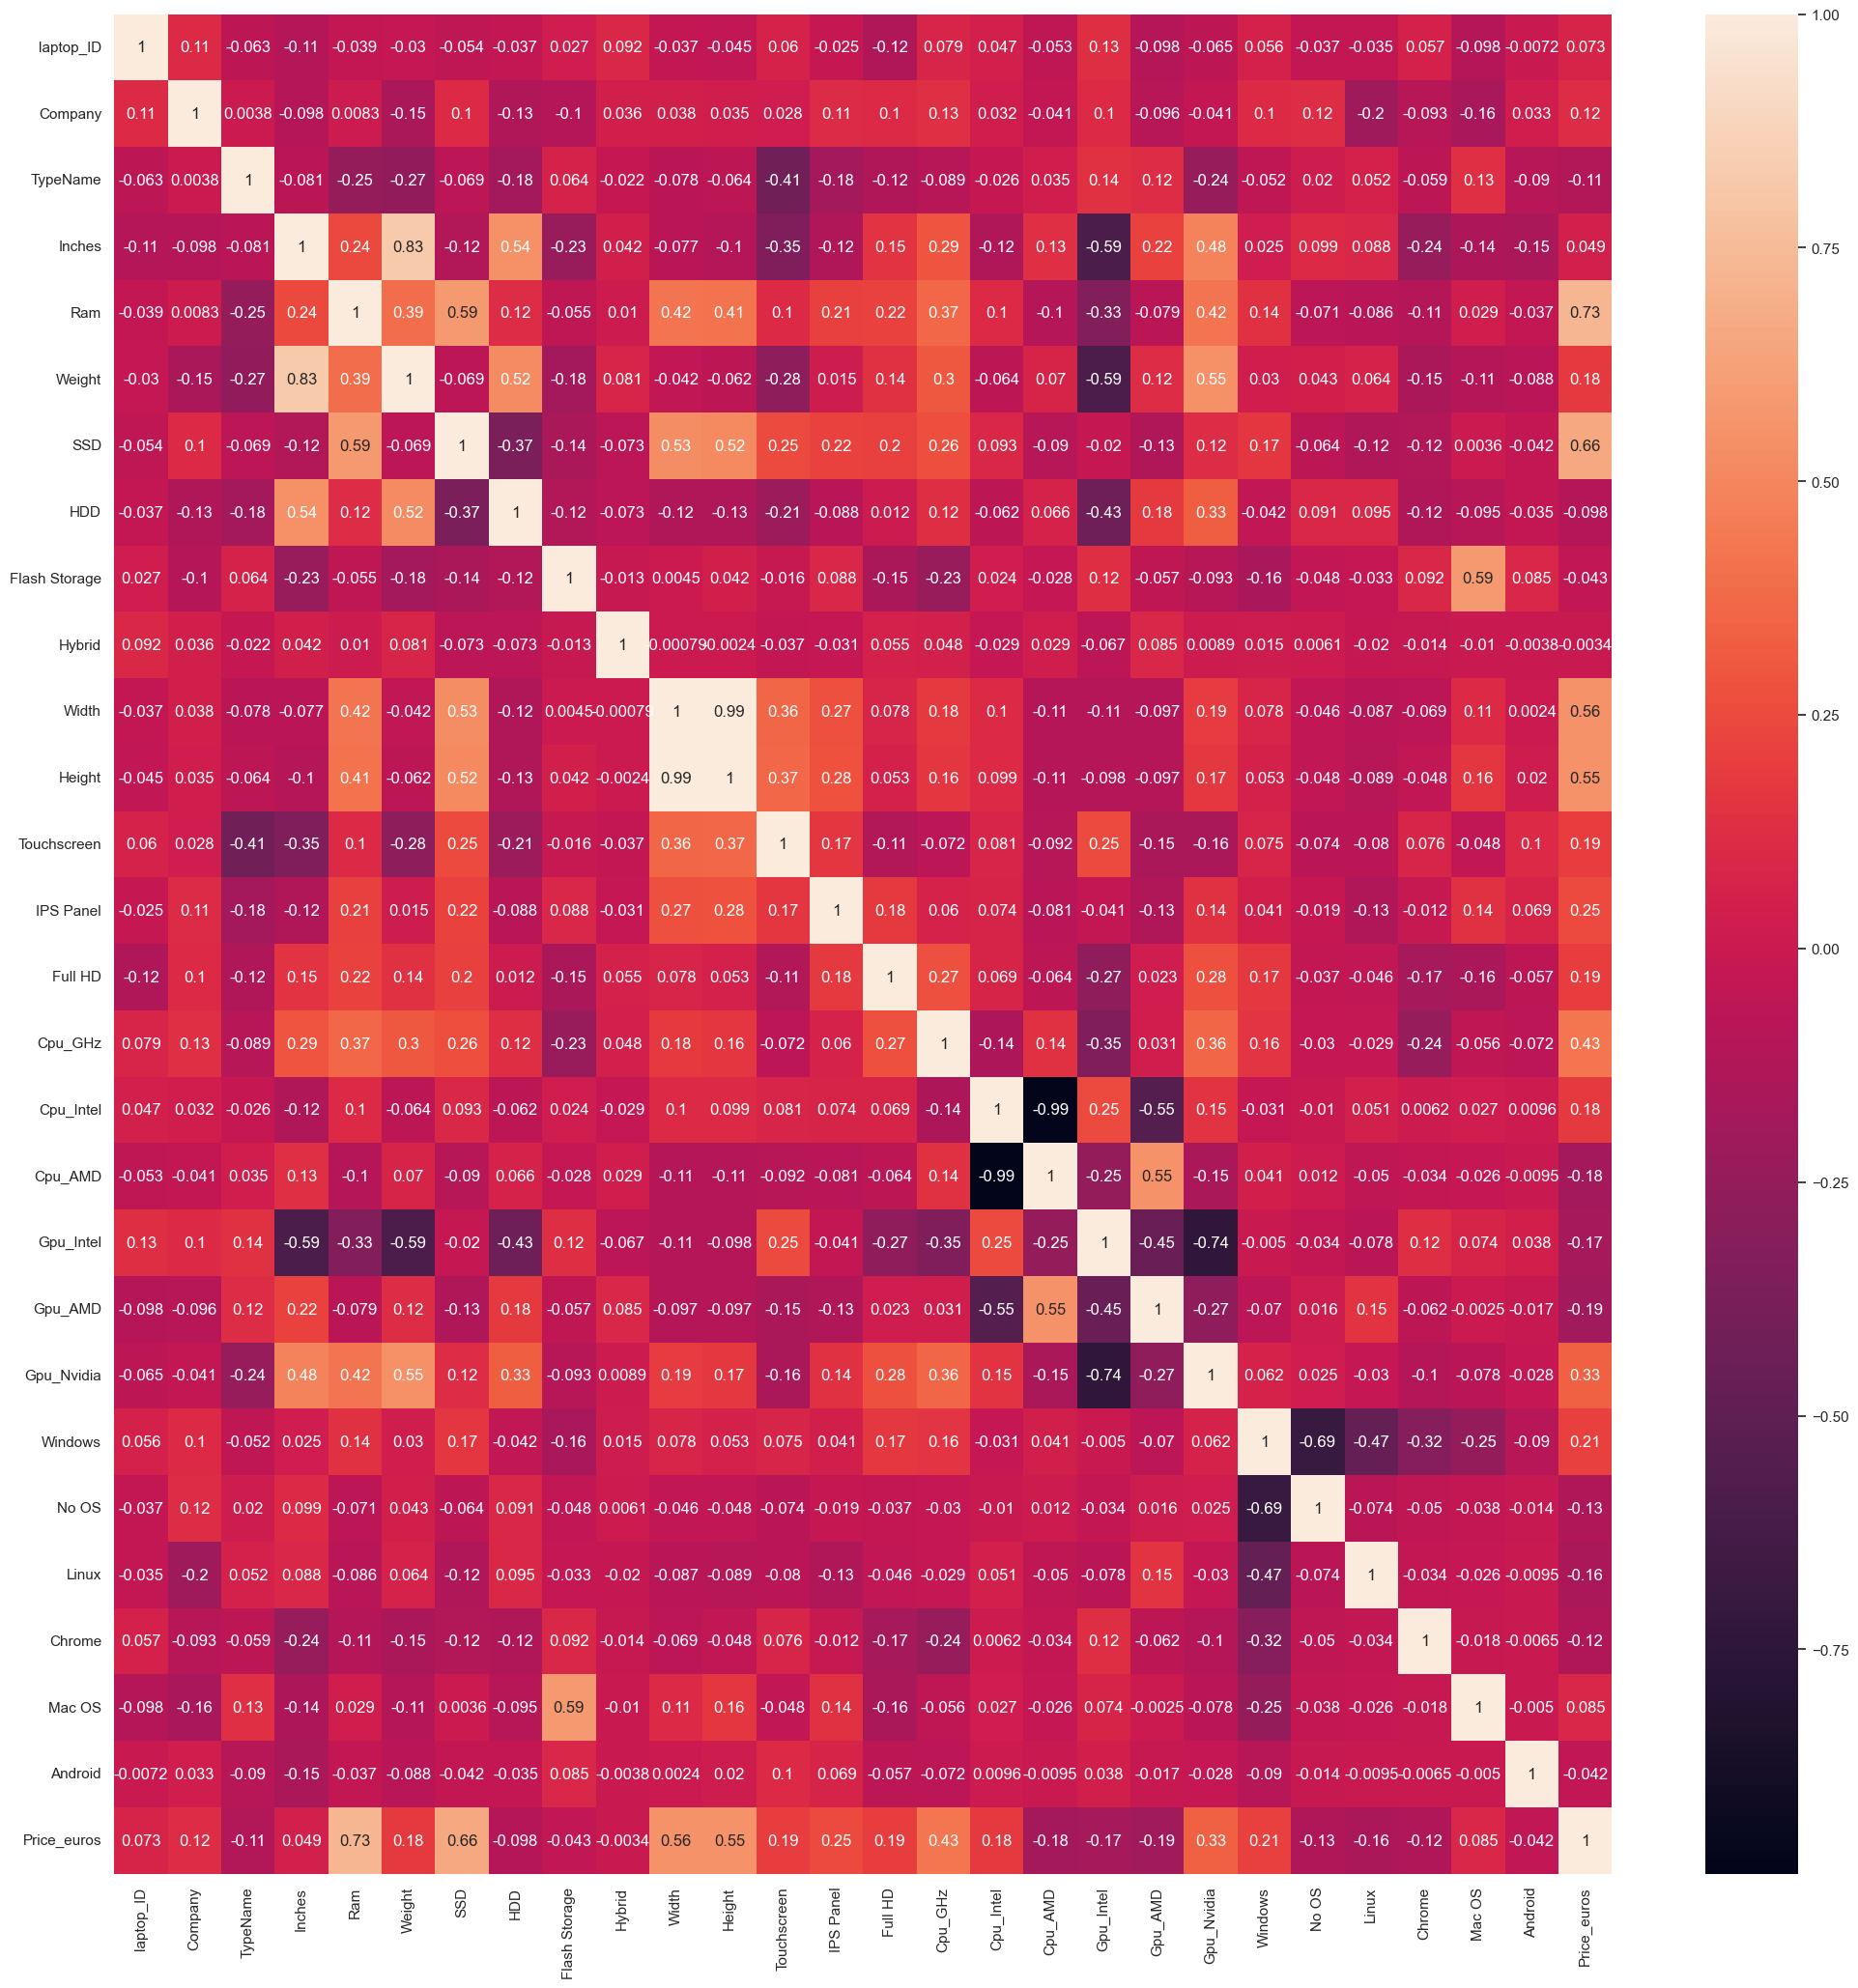

In [55]:
import seaborn as sns
corr = pd.concat([Xtrain, Ytrain], axis = 1).corr()
sns.set_theme(rc={'figure.figsize':(25,25)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(775, 27) (775,)
(333, 27) (333,)


In [58]:
df_test = pd.read_csv('Price_euros_test.csv')
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         195 non-null    int64  
 1   Company           195 non-null    object 
 2   Product           195 non-null    object 
 3   TypeName          195 non-null    object 
 4   Inches            195 non-null    float64
 5   ScreenResolution  193 non-null    object 
 6   Cpu               195 non-null    object 
 7   Ram               195 non-null    object 
 8   Memory            195 non-null    object 
 9   Gpu               195 non-null    object 
 10  OpSys             183 non-null    object 
 11  Weight            191 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.4+ KB


In [60]:
# посмотрим процент пропущенных значений
df_test_nan = df_test.loc[:, df_test.isnull().any()]   
df_test_nan.isnull().sum() / len(df_test_nan) * 100


ScreenResolution    1.025641
OpSys               6.153846
Weight              2.051282
dtype: float64

In [61]:
df_test["ScreenResolution"].fillna(df_test["ScreenResolution"].mode()[0], inplace=True)
df_test['OpSys'].fillna('No OS', inplace=True)
df_test["Weight"].fillna(df_test["Weight"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\536125449.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["ScreenResolution"].fillna(df_test["ScreenResolution"].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15768\536125449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [62]:
df_test['Memory'].value_counts()

Memory
256GB SSD                    68
1TB HDD                      36
512GB SSD                    18
500GB HDD                    14
128GB SSD +  1TB HDD         13
128GB SSD                    12
256GB SSD +  1TB HDD          7
32GB Flash Storage            4
1TB SSD                       3
256GB Flash Storage           3
512GB SSD +  1TB HDD          3
64GB Flash Storage            3
180GB SSD                     2
1.0TB Hybrid                  2
2TB HDD                       2
256GB SSD +  2TB HDD          1
32GB SSD                      1
512GB SSD +  1.0TB Hybrid     1
512GB SSD +  256GB SSD        1
16GB SSD                      1
Name: count, dtype: int64

In [63]:
df_test['Memory'].replace('512GB SSD +  256GB SSD', '512GB SSD +  256GB HDD', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15768\414169165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Memory'].replace('512GB SSD +  256GB SSD', '512GB SSD +  256GB HDD', inplace=True)


In [64]:
df_test['Memory'] = df_test['Memory'].str.replace('1.0TB', '1024GB')
df_test['Memory'] = df_test['Memory'].str.replace('1TB', '1024GB')
df_test['Memory'] = df_test['Memory'].str.replace('2TB', '2048GB')
df_test['Memory'] = df_test['Memory'].str.replace('GB', '')


In [65]:
df_test[df_test['Memory'].str.contains('SSD')]['Memory'].value_counts()

Memory
256 SSD                   68
512 SSD                   18
128 SSD +  1024 HDD       13
128 SSD                   12
256 SSD +  1024 HDD        7
1024 SSD                   3
512 SSD +  1024 HDD        3
180 SSD                    2
32 SSD                     1
256 SSD +  2048 HDD        1
512 SSD +  1024 Hybrid     1
512 SSD +  256 HDD         1
16 SSD                     1
Name: count, dtype: int64

In [66]:
df_test['SSD'] = 0
df_test['HDD'] = 0
df_test['Flash Storage'] = 0
df_test['Hybrid'] = 0

# Заполнение новых столбцов
for index, row in df_test.iterrows():
    parts = row['Memory'].split('+')
    for part in parts:
        if 'SSD' in part:
            df_test.at[index, 'SSD'] = int(''.join(filter(str.isdigit, part)))
        elif 'HDD' in part:
            df_test.at[index, 'HDD'] = int(''.join(filter(str.isdigit, part)))
        elif 'Flash Storage' in part:
            df_test.at[index, 'Flash Storage'] = int(''.join(filter(str.isdigit, part)))
        elif 'Hybrid' in part:
            df_test.at[index, 'Hybrid'] = int(''.join(filter(str.isdigit, part)))

In [67]:
df_test[df_test['Memory'] == '16 Flash Storage'][['SSD', 'HDD', 'Flash Storage', 'Hybrid', 'Memory']] 
df_test.drop(columns=['Memory'], inplace=True)

In [68]:
#разделим столбец с разрешением на ширину и длину
df_test[['Width', 'Height']] = df_test['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
df_test['Width'] = df_test['Width'].astype(int)
df_test['Height'] = df_test['Height'].astype(int)
df_test['Touchscreen'] = df_test['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

df_test['IPS Panel'] = df_test['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

df_test['Full HD'] = df_test['ScreenResolution'].apply(lambda x: 1 if 'Full HD' in x else 0)


In [69]:
df_test.drop(columns=['ScreenResolution'], inplace=True)
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,SSD,HDD,Flash Storage,Hybrid,Width,Height,Touchscreen,IPS Panel,Full HD
0,86,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,AMD Radeon R5,Windows 10,2.1kg,0,1024,0,0,1366,768,0,0,0
1,1249,Razer,Blade Pro,Gaming,14.0,Intel Core i7 7700HQ 2.8GHz,16GB,Nvidia GeForce GTX 1060,Windows 10,1.95kg,1024,0,0,0,1920,1080,0,0,1
2,122,Asus,VivoBook S15,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8GB,Nvidia GeForce 940MX,Windows 10,1.7kg,256,0,0,0,1920,1080,0,0,1
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16GB,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg,256,1024,0,0,1920,1080,0,0,1
4,739,Dell,Inspiron 3567,Notebook,15.6,Intel Core i5 7200U 2.5GHz,12GB,Intel HD Graphics 620,Windows 10,2.25kg,0,1024,0,0,1366,768,0,0,0


In [70]:
df_test['Weight'] = df_test['Weight'].astype(str)
df_test['Weight'] = df_test['Weight'].str.extract(r'([0-9.,]+)')
df_test['Weight'] = df_test['Weight'].astype(float)

In [71]:
df_test['Ram'] = df_test['Ram'].astype(str)
df_test['Ram'] = df_test['Ram'].str.extract(r'(\d+)')
df_test['Ram'] = df_test['Ram'].astype(int)

In [72]:
df_test[df_test['Cpu'].str.contains('GHz')]['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              32
Intel Core i7 7700HQ 2.8GHz             23
Intel Core i7 7500U 2.7GHz              18
Intel Core i5 6200U 2.3GHz              12
Intel Core i7 8550U 1.8GHz              10
Intel Core i5 8250U 1.6GHz               9
Intel Core i3 6006U 2GHz                 9
Intel Core i7 6700HQ 2.6GHz              8
Intel Core i7 6500U 2.5GHz               7
Intel Celeron Dual Core N3350 1.1GHz     6
Intel Core i7 6600U 2.6GHz               5
Intel Core i5 7300HQ 2.5GHz              4
Intel Celeron Dual Core N3060 1.6GHz     4
Intel Pentium Quad Core N4200 1.1GHz     4
Intel Core i7 7820HK 2.9GHz              3
AMD A6-Series 9220 2.5GHz                3
Intel Pentium Quad Core N3710 1.6GHz     3
Intel Core i7 7820HQ 2.9GHz              3
AMD A9-Series 9410 2.9GHz                2
Intel Core i3 7100U 2.4GHz               2
Intel Core i7 6820HQ 2.7GHz              2
Intel Core i5 6300U 2.4GHz               2
Intel Core i3 6006U 2.0GHz               2
Intel C

In [73]:
df_test['Cpu_GHz'] = df_test['Cpu'].str.extract(r'(\d+\.?\d*)GHz', expand = True)
df_test['Cpu_GHz'] = df_test['Cpu_GHz'].astype(float)

In [74]:
df_test['Cpu'].apply(lambda x: x.split()[0] if x.split() else None).value_counts()
df_test['Cpu_Intel'] = df_test['Cpu'].apply(lambda x: 1 if 'Intel' in x else 0)
df_test['Cpu_AMD'] = df_test['Cpu'].apply(lambda x: 1 if 'AMD' in x else 0)

In [75]:
df_test.drop(columns=['Cpu'], inplace=True)

In [76]:
df_test['Gpu'].apply(lambda x: x.split()[0] if x.split() else None).value_counts()

Gpu
Intel     111
Nvidia     60
AMD        24
Name: count, dtype: int64

In [77]:
df_test['Gpu_Intel'] = df_test['Gpu'].apply(lambda x: 1 if 'Intel' in x else 0)
df_test['Gpu_AMD'] = df_test['Gpu'].apply(lambda x: 1 if 'AMD' in x else 0)
df_test['Gpu_Nvidia'] = df_test['Gpu'].apply(lambda x: 1 if 'Nvidia' in x else 0)

In [78]:
df_test.drop(columns=['Gpu'], inplace=True)

In [79]:
df_test['OpSys'].value_counts()

OpSys
Windows 10      156
No OS            17
Windows 7         8
Linux             7
Chrome OS         2
Windows 10 S      2
macOS             2
Mac OS X          1
Name: count, dtype: int64

In [80]:
df_test['OpSys'] = df_test['OpSys'].str.replace('macOS', 'Mac OS')
df_test['Windows'] = df_test['OpSys'].apply(lambda x: 1 if 'Windows' in x else 0)
df_test['No OS'] = df_test['OpSys'].apply(lambda x: 1 if 'No OS' in x else 0)
df_test['Linux'] = df_test['OpSys'].apply(lambda x: 1 if 'Linux' in x else 0)
df_test['Chrome'] = df_test['OpSys'].apply(lambda x: 1 if 'Chrome' in x else 0)
df_test['Mac OS'] = df_test['OpSys'].apply(lambda x: 1 if 'Mac OS' in x else 0)
df_test['Android'] = df_test['OpSys'].apply(lambda x: 1 if 'Android' in x else 0)


In [81]:
df_test.drop(columns=['OpSys'], inplace=True)

In [82]:
df_test['Company'] = company_encoder.fit_transform(df_test['Company'].values)

In [83]:
df_test['TypeName'] = type_encoder.fit_transform(df_test['TypeName'].values)

In [84]:
df_test.drop(columns=['Product'], inplace=True)

In [109]:
Xtest = df_test.copy()

In [100]:
# result = {"index": df_test.index , "Price_euros": predictions, }
# df_result = pd.DataFrame(result)
# print(df_result)
# df_result.to_csv("results.csv", index=False)

     index  Price_euros
0        0   377.494025
1        1  2248.340946
2        2   828.219087
3        3  1965.839927
4        4   755.978209
..     ...          ...
190    190   719.539953
191    191   768.139625
192    192  1391.697327
193    193  1534.788042
194    194  1708.941041

[195 rows x 2 columns]


In [87]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [111]:
X_train_tensor = torch.tensor(Xtrain.values, dtype=torch.float32)
y_train_tensor = torch.tensor(Ytrain.values, dtype=torch.float32)
X_test_tensor = torch.tensor(Xtest.values, dtype=torch.float32)

scaler = StandardScaler()
X_train_tensor = torch.tensor(scaler.fit_transform(Xtrain), dtype=torch.float32)
X_test_tensor = torch.tensor(scaler.transform(Xtest), dtype=torch.float32)

X_train_tensor = X_train_tensor.unsqueeze(1) if X_train_tensor.dim() == 1 else X_train_tensor
y_train_tensor = y_train_tensor.unsqueeze(1) if y_train_tensor.dim() == 1 else y_train_tensor
X_test_tensor = X_test_tensor.unsqueeze(1) if X_test_tensor.dim() == 1 else X_test_tensor

In [112]:
Xtrain

,laptop_ID,Company,TypeName,Inches,Ram,Weight,SSD,HDD,Flash Storage,Hybrid,...,Cpu_AMD,Gpu_Intel,Gpu_AMD,Gpu_Nvidia,Windows,No OS,Linux,Chrome,Mac OS,Android
0,2,1,4,13.3,8,1.34,0,0,128,0,...,0,1,0,0,0,0,0,0,1,0
1,4,1,4,15.4,16,1.83,512,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,5,1,4,13.3,8,1.37,256,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,6,0,3,15.6,4,2.10,0,500,0,0,...,1,0,1,0,1,0,0,0,0,0
4,7,1,4,15.4,16,2.04,0,0,256,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1315,2,3,15.6,4,2.20,0,500,0,0,...,0,0,0,1,1,0,0,0,0,0
1104,1316,9,0,14.0,4,1.80,128,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1105,1318,9,3,14.0,2,1.50,0,0,64,0,...,0,1,0,0,1,0,0,0,0,0
1106,1319,7,3,15.6,6,2.19,0,1024,0,0,...,0,0,1,0,1,0,0,0,0,0


In [113]:
X_train_tensor.shape[1]

27

In [114]:
class SimpleNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

input_size = X_train_tensor.shape[1]  
hidden_size = 50  
output_size = 1 

model = SimpleNet(input_size, hidden_size, output_size)

In [115]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [116]:
loss = torch.nn.MSELoss()

In [124]:
def predict(net, x):
    y_pred = net.forward(x)
    return y_pred

In [131]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    Y_pred = model.forward(X_train_tensor)
    loss_val = loss(Y_pred, y_train_tensor)
    #print(loss_val)

    loss_val.backward()

    optimizer.step()

predict_data = predict(model, X_test_tensor)

In [132]:
print(predict_data)

tensor([[ 455.3356],
        [2567.0056],
        [ 778.5899],
        [1875.7896],
        [ 531.3047],
        [1987.7384],
        [2022.1488],
        [ 416.3985],
        [ 939.3734],
        [ 924.8898],
        [1301.8102],
        [ 762.0447],
        [1169.4398],
        [ 419.7420],
        [1393.1039],
        [2724.0864],
        [1168.5770],
        [ 406.0685],
        [ 886.2535],
        [ 576.7189],
        [ 620.8770],
        [1373.4960],
        [ 316.9488],
        [1591.6577],
        [2816.2527],
        [1313.7604],
        [ 853.6845],
        [ 400.7956],
        [ 880.1388],
        [3977.7334],
        [ 620.8919],
        [1638.9493],
        [ 644.8868],
        [1953.2961],
        [1039.1112],
        [ 984.6893],
        [1663.2384],
        [ 530.2059],
        [2720.6296],
        [1191.9882],
        [2632.1470],
        [ 418.5279],
        [ 322.0874],
        [1162.2715],
        [1239.6177],
        [1026.3279],
        [1754.0573],
        [2609

In [140]:
pred_data_vector = predict_data.detach().numpy()

In [145]:
pd.Series(pred_data_vector.reshape(-1))

0       455.335632
1      2567.005615
2       778.589905
3      1875.789551
4       531.304749
          ...     
190     720.979309
191     680.159973
192    1635.005493
193    1243.820801
194    1541.797852
Length: 195, dtype: float32

In [146]:
result = {"index": df_test.index , "Price_euros": pd.Series(pred_data_vector.reshape(-1)) }
df_result = pd.DataFrame(result)
print(df_result)
df_result.to_csv("results.csv", index=False)

     index  Price_euros
0        0   455.335632
1        1  2567.005615
2        2   778.589905
3        3  1875.789551
4        4   531.304749
..     ...          ...
190    190   720.979309
191    191   680.159973
192    192  1635.005493
193    193  1243.820801
194    194  1541.797852

[195 rows x 2 columns]
